# Group comparison activation results
This notebook walks through the brain activation results for the OCD baseline project.

In short, brain activity in response to threat / safety reversal learning replicated previous effects well, but no healthy control versus OCD differences were observed.

In [1]:
import sys
import numpy as np
sys.path.append("../code/")
subj_list = list(np.loadtxt('../code/subject_list_exclusions.txt', dtype='str'))

## ROI analyses
Parameters to consider:
- Eroded ROI (controlling for ROI size)
- GLM pipeline
    - smooth the data (should the data get smoothed twice in the ROI analysis, essentially)
    - despiking
    - gsr etc., regression

In [2]:
import pandas as pd
import numpy as np
from glms.glm_beta_stats import load_betas, run_roi_stats

roi_df = pd.read_csv('../code/roi_details.csv')
results_df = load_betas(subj_list, glm_label='smooth-6mm_despike', eroded=False)
stats_df = run_roi_stats(results_df, roi_df)
stats_df[stats_df.test == '1samp'].to_csv('../results/betas_1samp.csv', index=False)
stats_df[stats_df.test == '1samp'].head(11)

,test,roi,contrast,T,dof,cohen-d,p-val-corrected,BF10
T-test,1samp,Insula (L),Threat reversal,4.86,89,0.51,0.0001,3165.23
T-test,1samp,Insula (R),Threat reversal,4.17,89,0.44,0.0007,265.01
T-test,1samp,dACC,Threat reversal,0.62,89,0.06,1.0000,0.14
T-test,1samp,vmPFC,Safety reversal,5.34,89,0.56,0.0000,19730.00
T-test,1samp,PCC,Safety reversal,4.03,89,0.42,0.0002,162.52
T-test,1samp,Putamen (L),Threat reversal,3.50,89,0.37,0.0037,31.27
T-test,1samp,Putamen (R),Threat reversal,4.14,89,0.44,0.0007,234.44
T-test,1samp,Caudate (L),Threat reversal,0.52,89,0.05,1.0000,0.13
T-test,1samp,Caudate (R),Threat reversal,3.72,89,0.39,0.0022,61.45
T-test,1samp,GP (L),Threat reversal,0.96,89,0.10,1.0000,0.18


In [3]:
stats_df[stats_df.test == '2samp'].to_csv('../results/betas_2samp.csv', index=False)
stats_df[stats_df.test == '2samp'].head(11)

,test,roi,contrast,T,dof,cohen-d,p-val-corrected,BF10
T-test,2samp,Insula (L),Threat reversal,0.29,88,0.06,1.0000,0.23
T-test,2samp,Insula (R),Threat reversal,-0.54,88,0.11,1.0000,0.25
T-test,2samp,dACC,Threat reversal,-0.96,88,0.20,1.0000,0.33
T-test,2samp,vmPFC,Safety reversal,0.90,88,0.19,0.6974,0.32
T-test,2samp,PCC,Safety reversal,0.73,88,0.15,0.6974,0.28
T-test,2samp,Putamen (L),Threat reversal,-0.86,88,0.18,1.0000,0.30
T-test,2samp,Putamen (R),Threat reversal,0.67,88,0.14,1.0000,0.27
T-test,2samp,Caudate (L),Threat reversal,0.26,88,0.05,1.0000,0.23
T-test,2samp,Caudate (R),Threat reversal,-0.44,88,0.09,1.0000,0.24
T-test,2samp,GP (L),Threat reversal,-1.82,88,0.38,1.0000,0.94


### Plot brain activation distributions for the ROI

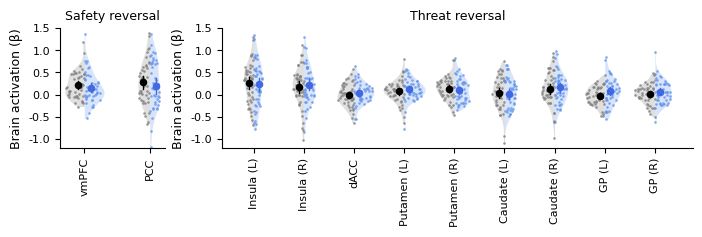

In [4]:
from sinaplot import sinaplot
import seaborn as sns
import matplotlib.pyplot as plt

# create figure
fig, axs = plt.subplot_mosaic("""
                              AABBBBBBBBB
                              """,
                              figsize=(6.9,2.25),
                              constrained_layout=True)
plt.rc('axes', labelsize=9)
plt.rcParams['svg.fonttype'] = 'none'


# plot_dict
plot_dict = dict(A='Safety reversal',
                 B='Threat reversal')

for ax in plot_dict:

    x_labels = []
    pos=0
    df = roi_df[roi_df.contrast == plot_dict[ax]]

    for r, row in df.iterrows():
        x_labels.append(row.ROI)

        for group in ['control', 'patient']:
            data = results_df.loc[(results_df.method == 'region')
                                    & (results_df.roi == row.label)
                                    & (results_df.group == group)
                                    & (results_df.contrast == row.contrast)]
            y = data.value.values

            # set some values based on group
            if group == 'control':
                direction = 'left'
                col = 'grey'
                mean_col = 'k'

            elif group == 'patient':
                direction = 'right'
                col = 'cornflowerblue'
                mean_col = 'royalblue'

            sinaplot(y, pos, ax=axs[ax],
                     direction=direction,
                     colour=col,
                     mean_colour=mean_col,
                     raw_alpha=0.8,
                     raw_size=3.5,
                     mean_size=30,
                     kde_res=1000, kde_width=0.25, kde_alpha=0.25,
                     cov_factor=0.5, x_dodge=0.1)
        pos = pos+1
    # general plot properties
    axs[ax].set_title(plot_dict[ax], fontsize=9)
    axs[ax].set_ylim([-1.2, 1.5])
    axs[ax].set_ylabel('Brain activation (β)', size=9)
    axs[ax].set_yticks(np.arange(-1, 2.0, 0.5))
    axs[ax].set_yticklabels(np.arange(-1, 2.0, 0.5),fontsize=8)
    axs[ax].set_xticks(range(len(x_labels)))
    axs[ax].set_xticklabels(x_labels, fontsize=8, rotation=90)
    sns.despine()
plt.savefig('../figures/activity_sinaplots.svg', dpi=300, pad_inches=0.2)
plt.show()

### Plot condition patterns for two examplar roi

/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


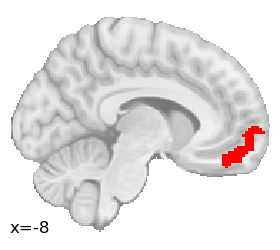

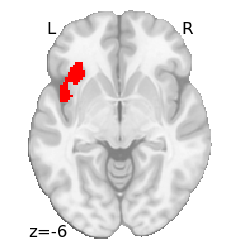

In [5]:
from nilearn.image import new_img_like
from functions.data_helpers import get_computer
from nilearn import plotting
import nibabel as nib

_, proj_dir = get_computer()
roi_dir = proj_dir+'data/derivatives/masks/'
bg_img = (proj_dir + 'data/derivatives/masks/'
          + 'tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

# examplar roi information
examplar_roi = ['vmpfc', 'rightInsula']
examplar_coords = [-8, -6]
display_modes = ['x', 'z']

# %% brain pics
for roi, coord, dm in zip(examplar_roi, examplar_coords, display_modes):
    row = roi_df[roi_df.label == roi]
    img = roi_dir + row.nii.values[0]
    plotting.plot_roi(img, bg_img=bg_img, black_bg=False, display_mode=dm, cut_coords=[coord],
                    resampling_interpolation='continuous', alpha=1, cmap='bwr_r')
    #plt.savefig()
    plt.show()

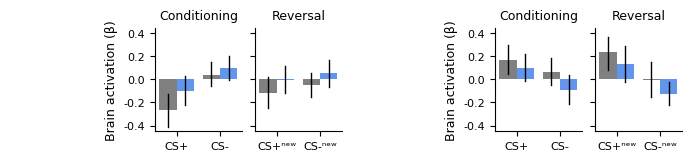

In [6]:
# create plot
fig, axs = plt.subplot_mosaic("""
                            ZABXCD
                            """, figsize=(6.8, 1.5), constrained_layout=True)
ax_list = ['A', 'B', 'C', 'D']
plt.rc('axes', labelsize=9)
plt.rcParams['svg.fonttype'] = 'none'

c = 0
for roi in examplar_roi:
    for phase in ['conditioning', 'reversal']:
        # get phase and ROI specific data
        tmp_df = results_df.loc[(results_df.method == 'region')
                                & (results_df.phase == phase)
                                & (results_df.roi == roi)]

        # simple bar plot
        g = sns.barplot(data=tmp_df, x='trial_type', y='value', hue='group', units='subj',
                        palette=['grey', 'cornflowerblue'], ax=axs[ax_list[c]], order=['CS+', 'CS-'],
                        saturation=1, errcolor='k', errwidth=1)

        g.set(ylim=(-0.45, 0.45))  # all ratings should be visible
        g.set(xlabel='')

        # change the fontsize
        g.set_yticks(np.arange(-.4, .45, .2))
        g.set_yticklabels(np.arange(-.4, .45, .2).round(1), fontsize=8)
        g.set_xticks(range(0, 2))
        g.set_xticklabels(['CS+', 'CS-'], fontsize=8)

        # y axis details
        if c == 0 or c == 2:
            g.set_ylabel('Brain activation (β)', size=9)
        else:
            g.set(ylabel='')  # remove y info
            g.set(yticklabels=[])

        # x axis details
        g.set_title(phase.title(), fontdict={'fontsize': 9})

        if c == 1 or c == 3:
            g.set_xticklabels(['CS+ⁿᵉʷ', 'CS-ⁿᵉʷ'], fontsize=8)

        g.get_legend().remove()
        c = c+1

sns.despine()
axs['Z'].set_axis_off()
axs['X'].set_axis_off()
plt.show()

# Exploratory whole-brain analysis

## One sample results

/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()
/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


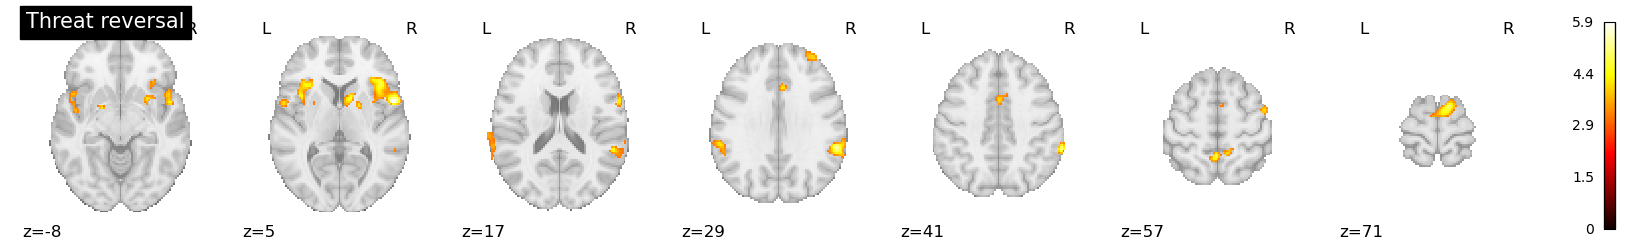

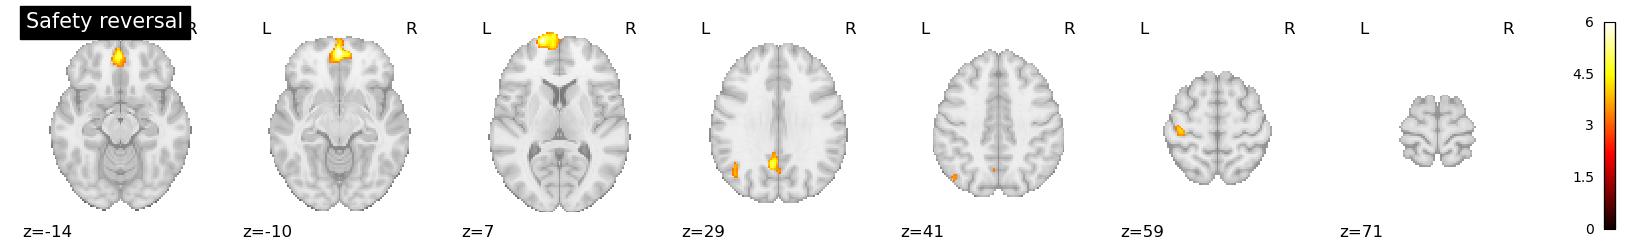

In [7]:
# what analysis pipeline? default = 'smooth-6mm_despike'
analysis_label = 'smooth-6mm_despike'

# what thresholding to use? default = '_h-001_c-05'
thr_height = '001'
thr_clust = '01'
secondlevel_dir = (proj_dir+'data/derivatives/post-fmriprep-fix/spm_group/glm_'
                   + analysis_label+'/1samp'+'_h-'+thr_height+'_c-'+thr_clust+'/')
between_dir = (proj_dir+'data/derivatives/post-fmriprep-fix/spm_group/glm_'
               + analysis_label+'/2samp/'+'_h-'+thr_height+'_c-'+thr_clust+'/')

bg_img = (proj_dir + 'data/derivatives/masks/'
          + 'tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

# quick plot to inspect results
filename = 'con_0006/spmT_0001_thr'
img = nib.load(secondlevel_dir+filename+'.nii')
plotting.plot_stat_map(img, colorbar=True, draw_cross=False, display_mode='z', title='Threat reversal')
plotting.show()

filename = 'con_0007/spmT_0001_thr'
img = nib.load(secondlevel_dir+filename+'.nii')
plotting.plot_stat_map(img, colorbar=True, draw_cross=False, display_mode='z', title='Safety reversal')
plotting.show()

### manuscript plot

/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


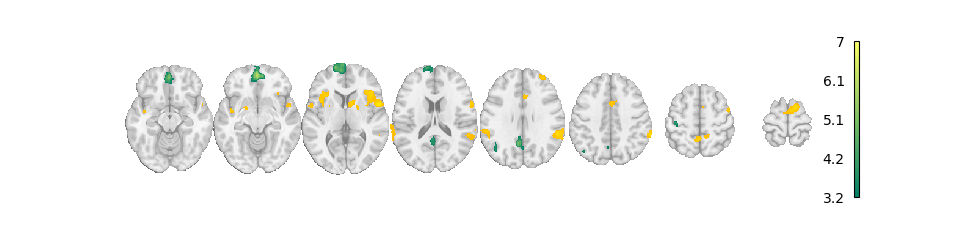

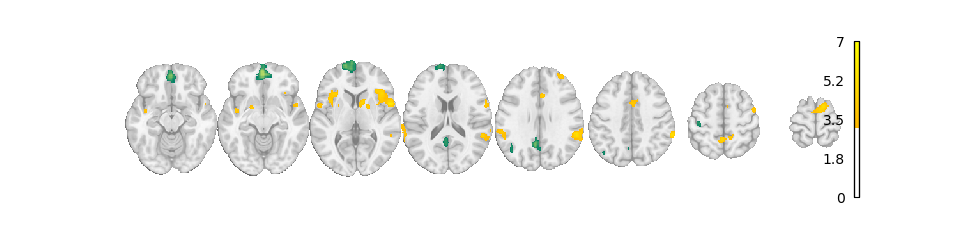

In [8]:
# create figure
fig, axs = plt.subplot_mosaic("""
                              A
                              """,
                              figsize=(9.5,2.25),
                              constrained_layout=True)
cmap1 = plt.cm.autumn
cmap2 = plt.cm.summer
cut_coords = [-14, -10, 5, 17, 29, 41, 57, 71]

filename = 'con_0006/spmT_0001_thr'
img1 = nib.load(secondlevel_dir+filename+'.nii')
filename = 'con_0007/spmT_0001_thr'
img2 = nib.load(secondlevel_dir+filename+'.nii')

display = plotting.plot_stat_map(img1,
                       bg_img=bg_img,
                       black_bg=False,
                       annotate=False,
                       display_mode='z',
                       cut_coords=cut_coords,
                       axes=axs['A'],
                       cmap=cmap1,
                       colorbar=False,
                       threshold=3.2,
                       vmax=7)
display.add_overlay(img2, cmap=cmap2, vmax=7, colorbar=True, threshold = 3.2)
plt.savefig('../figures/glm_wholebrain_thresholded.svg', dpi=300, pad_inches=0.2)
plotting.show()

# plot the colorbars
fig, axs = plt.subplot_mosaic("""
                              A
                              """,
                              figsize=(9.5,2.25),
                              constrained_layout=True)

display = plotting.plot_stat_map(img1,
                       bg_img=bg_img,
                       black_bg=False,
                       annotate=False,
                       display_mode='z',
                       cut_coords=cut_coords,
                       axes=axs['A'],
                       cmap=cmap1,
                       colorbar=True,
                       threshold=3.2,
                       vmax=7)
display.add_overlay(img2, cmap=cmap2, vmax=7, colorbar=False, threshold = 3.2)
plt.savefig('../figures/glm_wholebrain_thresholded_colorbar.svg', dpi=300, pad_inches=0.2)
plotting.show()

## Two sample results

/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


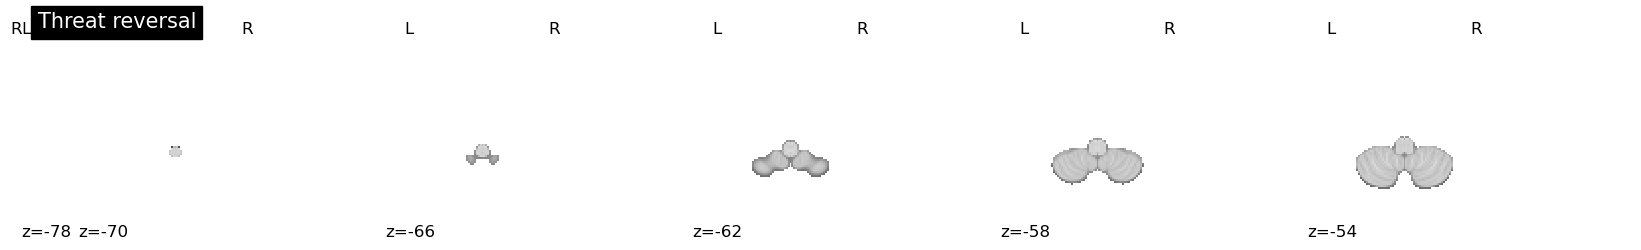

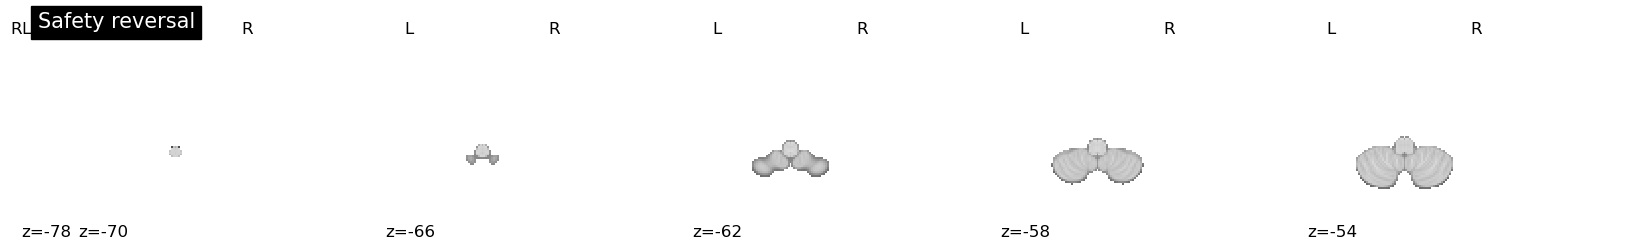

In [9]:
between_dir = (proj_dir+'data/derivatives/post-fmriprep-fix/spm_group/glm_'
               + analysis_label+'/2samp_HC>PAT'+'_h-'+thr_height+'_c-'+thr_clust+'/')

# quick plot to inspect results
filename = 'con_0006/spmT_0001_thr'
img = nib.load(between_dir+filename+'.nii')
plotting.plot_stat_map(img, colorbar=True, draw_cross=False, display_mode='z', title='Threat reversal')
plotting.show()

filename = 'con_0007/spmT_0001_thr'
img = nib.load(between_dir+filename+'.nii')
plotting.plot_stat_map(img, colorbar=True, draw_cross=False, display_mode='z', title='Safety reversal')
plotting.show()

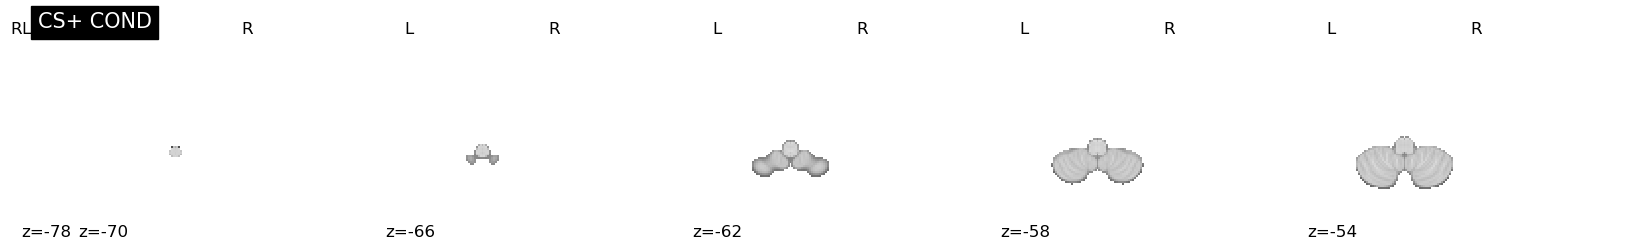

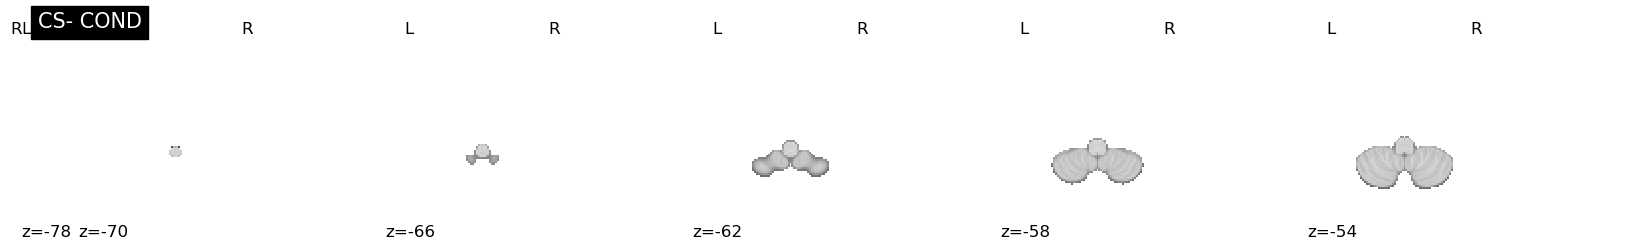

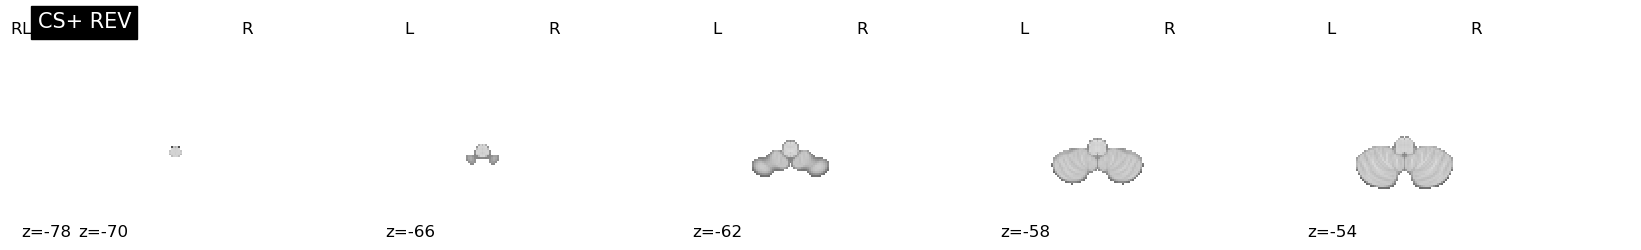

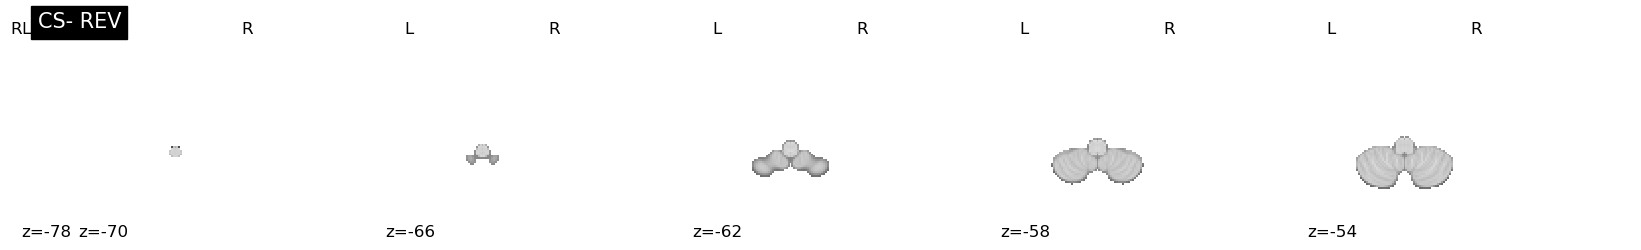

In [10]:
# quick plot to inspect results
for i, title in zip(['1', '2', '3', '4'], ['CS+ COND', 'CS- COND','CS+ REV', 'CS- REV']):
    filename = 'con_000'+i+'/spmT_0001_thr'
    img = nib.load(between_dir+filename+'.nii')
    plotting.plot_stat_map(img, colorbar=True, draw_cross=False, display_mode='z', title=title)
    plotting.show()

# Impact of awareness

In [11]:
import pandas as pd
import numpy as np
from glms.glm_beta_stats import load_betas, run_roi_stats
from functions.data_helpers import get_task_beh_data, get_phenotype, get_awareness_labels

roi_df = pd.read_csv('../code/roi_details.csv')
results_df = load_betas(subj_list, glm_label='smooth-6mm_despike', eroded=False)

# change to new groups
df = get_phenotype(subj_list, ['participants'])
df['group-awareness'] = get_awareness_labels(subj_list)

results_df.group = np.nan
for subj in results_df.subj.unique():
    new_group = df.loc[df.participant_id == subj, 'group-awareness'].values[0]
    results_df.loc[results_df.subj == subj, 'group'] = new_group
results_df.head(3)

,value,method,roi,phase,trial_type,subj,group,contrast
0,0.019550,region,rightInsula,conditioning,CS+,sub-control01,control-aware,NaN
1,0.054043,region,acc,conditioning,CS+,sub-control01,control-aware,NaN
2,0.203870,region,leftInsula,conditioning,CS+,sub-control01,control-aware,NaN


In [12]:
import pandas as pd
import pingouin as pg

# beta extraction method
method = 'region'
eroded = False

# perform a bunch of ANOVAS
# loop through ROI and perform statistics
stat_df = pd.DataFrame()
for index, row in roi_df.iterrows():

    # one sample t-tests
    a = results_df.loc[(results_df.method == method)
                        & (results_df.roi == row.label)
                        & (results_df.contrast == row.contrast)]

    res = pg.anova(data=a, dv='value', between='group')
    res['roi'] = row.ROI  # use the neater ROI label
    res['contrast'] = row.contrast
    res['test'] = 'ANOVA'
    stat_df = pd.concat([stat_df, res])

    if res['p-unc'][0] < 0.05:
        print('Sig. Anova')

# do multiple comparison correction:
pvals = stat_df['p-unc'].values
_, pvals_corr = pg.multicomp(pvals, method='fdr_by')
stat_df['p-val-corrected'] = pvals_corr
stat_df.to_csv('../results/awareness_ANOVAs.csv', index=False)

stat_df

,Source,ddof1,ddof2,F,p-unc,np2,roi,contrast,test,p-val-corrected
0,group,2,87,0.807068,0.449476,0.018215,Insula (L),Threat reversal,ANOVA,1.0
0,group,2,87,0.272553,0.762081,0.006227,Insula (R),Threat reversal,ANOVA,1.0
0,group,2,87,0.645304,0.526995,0.014618,dACC,Threat reversal,ANOVA,1.0
0,group,2,87,0.407791,0.666382,0.009287,vmPFC,Safety reversal,ANOVA,1.0
0,group,2,87,0.333896,0.717042,0.007617,PCC,Safety reversal,ANOVA,1.0
0,group,2,87,0.798071,0.453464,0.018016,Putamen (L),Threat reversal,ANOVA,1.0
0,group,2,87,0.656985,0.520965,0.014878,Putamen (R),Threat reversal,ANOVA,1.0
0,group,2,87,0.071238,0.931295,0.001635,Caudate (L),Threat reversal,ANOVA,1.0
0,group,2,87,0.100435,0.904549,0.002304,Caudate (R),Threat reversal,ANOVA,1.0
0,group,2,87,2.406264,0.096129,0.052417,GP (L),Threat reversal,ANOVA,1.0


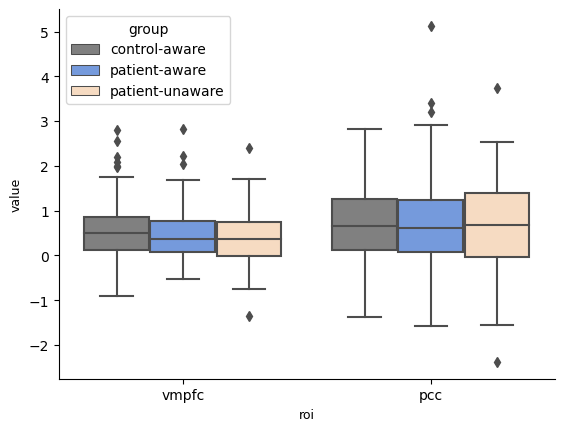

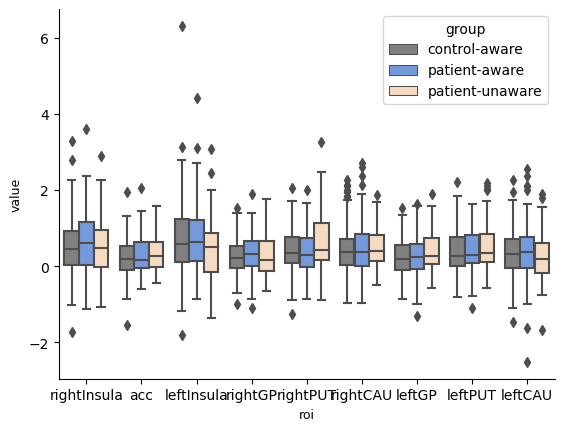

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


plot_dict = dict(A='Safety reversal',
                 B='Threat reversal')

for ax in plot_dict:

    roi_list = roi_df[roi_df.contrast == plot_dict[ax]].label.to_list()
    roi_labels = roi_df[roi_df.contrast == plot_dict[ax]].ROI.to_list()

    # filter by ROI
    tmp = results_df[results_df.roi.isin(roi_list)]

    # filter by contrast
    tmp = tmp[tmp.contrast == plot_dict[ax]]

    sns.boxplot(data=tmp, x='roi', y='value', hue='group',
                palette=['gray', 'cornflowerblue', 'peachpuff'])
    sns.despine()
    plt.show()


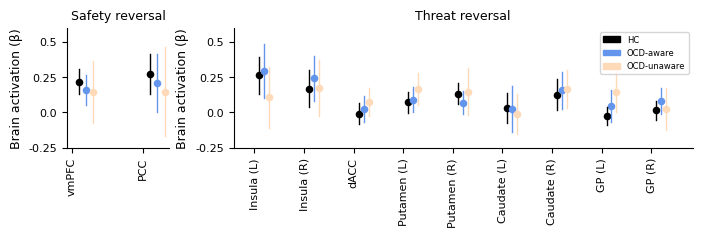

/home/lukeh/miniconda3/envs/py39/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [14]:
from sinaplot import sinaplot
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt

# create figure
fig, axs = plt.subplot_mosaic("""
                              AABBBBBBBBB
                              """,
                              figsize=(6.9,2.25),
                              constrained_layout=True)
plt.rc('axes', labelsize=9)
plt.rcParams['svg.fonttype'] = 'none'


# plot_dict
plot_dict = dict(A='Safety reversal',
                 B='Threat reversal')

for ax in plot_dict:

    x_labels = []
    pos=0
    df = roi_df[roi_df.contrast == plot_dict[ax]]

    for r, row in df.iterrows():
        x_labels.append(row.ROI)

        for group in ['control-aware', 'patient-aware', 'patient-unaware']:
            data = results_df.loc[(results_df.method == 'region')
                                    & (results_df.roi == row.label)
                                    & (results_df.group == group)
                                    & (results_df.contrast == row.contrast)]
            y = data.value.values

            # set some values based on group
            if group == 'control-aware':
                direction = 'right'
                col = 'grey'
                mean_col = 'k'
                x_dodge=0.1

            elif group == 'patient-aware':
                direction = 'right'
                col = 'cornflowerblue'
                mean_col = 'cornflowerblue'
                x_dodge=0.2

            elif group == 'patient-unaware':
                direction = 'right'
                col = 'peachpuff'
                mean_col = 'peachpuff'
                x_dodge=0.3

            sinaplot(y, pos, ax=axs[ax],
                     direction=direction,
                     colour=col,
                     mean_colour=mean_col,
                     raw_alpha=0,
                     raw_size=0,
                     mean_size=30,
                     kde_res=1000, kde_width=0.25, kde_alpha=0,
                     cov_factor=0.5, x_dodge=x_dodge)
        pos = pos+1
    # general plot properties
    axs[ax].set_title(plot_dict[ax], fontsize=9)
    axs[ax].set_ylim([-.25, 0.6])
    axs[ax].set_ylabel('Brain activation (β)', size=9)
    axs[ax].set_yticks(np.arange(-0.25, 0.75, 0.25))
    axs[ax].set_yticklabels(np.arange(-0.25, 0.75, 0.25),fontsize=8)
    axs[ax].set_xticks(range(len(x_labels)))
    axs[ax].set_xticklabels(x_labels, fontsize=8, rotation=90)
    sns.despine()

grey_patch = mpatches.Patch(color='black', label='HC')
blue_patch = mpatches.Patch(color='cornflowerblue', label='OCD-aware')
peach_patch = mpatches.Patch(color='peachpuff', label='OCD-unaware')

plt.legend(handles=[grey_patch, blue_patch, peach_patch], prop={'size': 6}, loc='upper right')
plt.savefig('../figures/activity_awareness_sinaplots.png', dpi=300, pad_inches=0.2)
plt.show()